# Pymaceuticals Inc.
---

### Analysis

- There were more observations for mice treated with Capomulin and Ramicane.
- There is uniform distribution between male and female mice on the study.
- The Final Tumor Volume for mice treated with Capomulin and Ramicane are statistically lower than the Final Tumor Volume of mice treated with Infubinol or Ceftamin.
- The data revealed evidence of one outlier point for the Final Tumor Volumne in mice treated with Infubinol.
- There is a strong positive Correlation between the weight and the Avg. Tumor Volume for mice treated with Camopulin.

## Dependencies and Data

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as s
import random

In [2]:
# DataFrame Creation
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Data Merge & Preview
main_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
main_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
main_data["Mouse ID"].nunique()

249

In [4]:
# Checking for any Mouse ID with duplicated Timepoint
duplicated_rows = main_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
main_data[duplicated_rows]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Get all the data for the duplicated Mouse ID g989
duplicated_mouse_id = main_data.loc[main_data["Mouse ID"]=="g989", :]
duplicated_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = main_data[main_data["Mouse ID"]!="g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Summary Statistics table of mean, median, variance, standard deviation, and SEM of the Tumor Volume (mm3) for each Drug Regimen
drug_regimen_data = clean_data.groupby("Drug Regimen")
tumor_volume_summary_by_drug = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_data["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": drug_regimen_data["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance": drug_regimen_data["Tumor Volume (mm3)"].var(),
    "Tumor Volumne Std. Dev.": drug_regimen_data["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err.": drug_regimen_data["Tumor Volume (mm3)"].sem()})

tumor_volume_summary_by_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volumne Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Summary Statistics table of mean, median, variance, standard deviation, and SEM of the Tumor Volume (mm3) for each Drug Regimen (Using the Aggregate method of Pandas)
clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

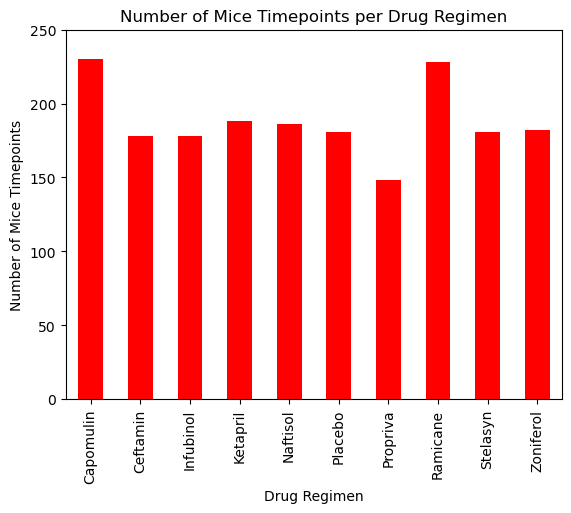

In [10]:
# Bar Plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen.
drug_regimen_data["Mouse ID"].count().plot(kind="bar", color="Red")
plt.title("Number of Mice Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Timepoints")
plt.ylim(0, 250)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

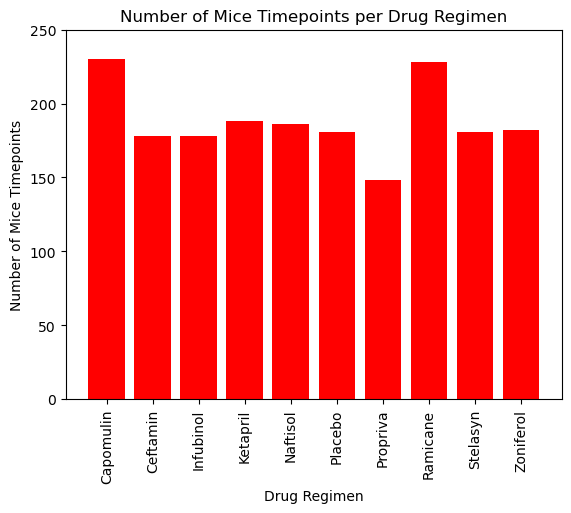

In [11]:
# Bar Plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_data["Mouse ID"].count().index, drug_regimen_data["Mouse ID"].count().values, color="Red",)
plt.title("Number of Mice Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Timepoints")
plt.ylim(0, 250)
plt.xticks(rotation="vertical")
plt.show

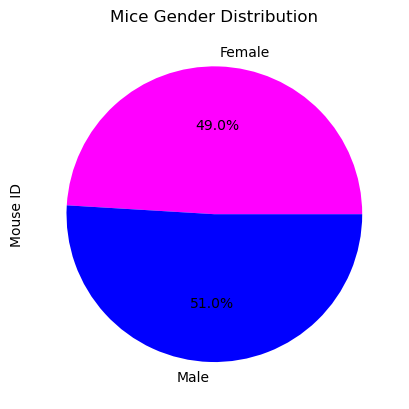

In [12]:
# Pie Plot showing the distribution of female versus male mice using Pandas
clean_data.groupby("Sex")["Mouse ID"].count().plot(kind="pie", colors=["Fuchsia", "Blue"], autopct="%1.1f%%")
plt.title("Mice Gender Distribution")
plt.show()

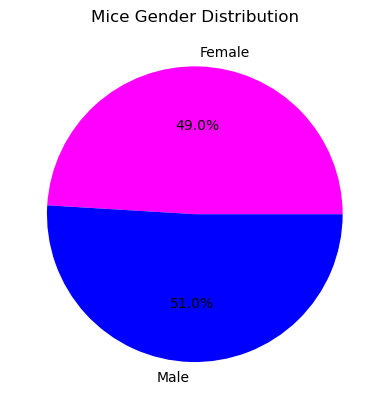

In [13]:
# Pie Plot showing the distribution of female versus male mice using pyplot
labels = clean_data.groupby("Sex")["Mouse ID"].count().index
plt.pie(clean_data.groupby("Sex")["Mouse ID"].count(), labels=labels, colors=["Fuchsia", "Blue"], autopct="%1.1f%%")
plt.title("Mice Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
highest_timepoint_by_mouse = clean_data.groupby("Mouse ID")["Timepoint"].max()
highest_timepoint_by_mouse = pd.DataFrame(highest_timepoint_by_mouse)
highest_timepoint_by_mouse.reset_index(inplace=True)
highest_timepoint_by_mouse_data = pd.merge(highest_timepoint_by_mouse, clean_data, how="left", on=["Mouse ID", "Timepoint"])
highest_timepoint_by_mouse_data = highest_timepoint_by_mouse_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
highest_timepoint_by_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    tumor_volume_data = highest_timepoint_by_mouse_data.loc[highest_timepoint_by_mouse_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    quartiles = tumor_volume_data.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75]-quartiles[0.25]
    outlier_lower_limit = quartiles[0.25] - (1.5 * iqr)
    outlier_upper_limit = quartiles[0.75] + (1.5 * iqr)
    outliers = [volume for volume in tumor_volume_data if volume> outlier_upper_limit or volume < outlier_lower_limit]
    print(f"{treatment}'s Interquantil Range (IQR) is {round(iqr,2)} and it's potential outliers are: {outliers}")

Capomulin's Interquantil Range (IQR) is 7.78 and it's potential outliers are: []
Ramicane's Interquantil Range (IQR) is 9.1 and it's potential outliers are: []
Infubinol's Interquantil Range (IQR) is 11.48 and it's potential outliers are: [36.3213458]
Ceftamin's Interquantil Range (IQR) is 15.58 and it's potential outliers are: []


<function matplotlib.pyplot.show(close=None, block=None)>

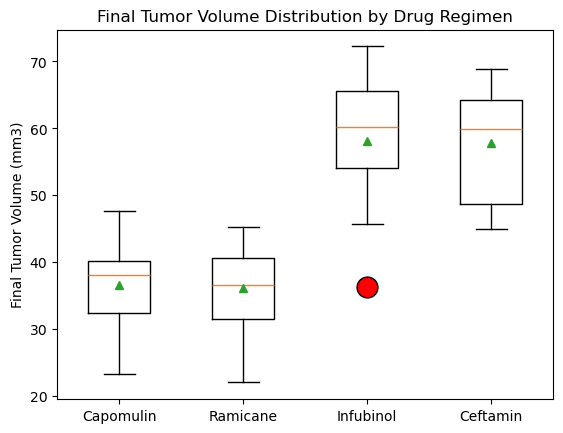

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

position = 1

flierprops = {
    "marker": "o",
    "markerfacecolor": "Red",
    "markeredgecolor": "Black",
    "markersize": 15}

for treatment in treatment_list:
    tumor_volume_data = highest_timepoint_by_mouse_data.loc[highest_timepoint_by_mouse_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    plt.boxplot(tumor_volume_data, positions=[position], widths=0.5, labels=[treatment], showmeans=True, flierprops=flierprops)
    position += 1

plt.title("Final Tumor Volume Distribution by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

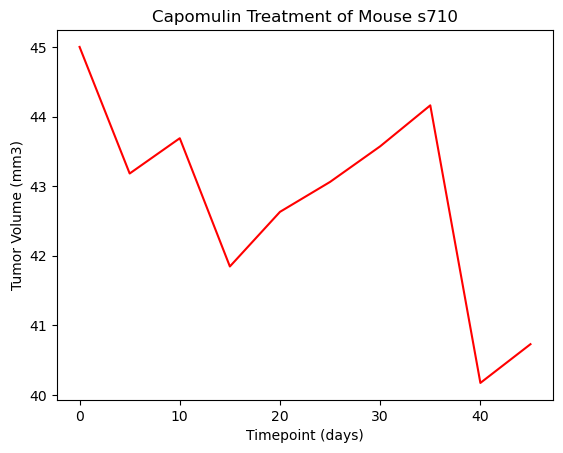

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_id = random.choice(clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", "Mouse ID"].values)
time_points_data = clean_data.loc[clean_data["Mouse ID"] == capomulin_mouse_id, "Timepoint"].values
tumor_volume_data = clean_data.loc[clean_data["Mouse ID"] == capomulin_mouse_id, "Tumor Volume (mm3)"].values
plt.plot(time_points_data, tumor_volume_data, color="Red")
plt.title(f"Capomulin Treatment of Mouse {capomulin_mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

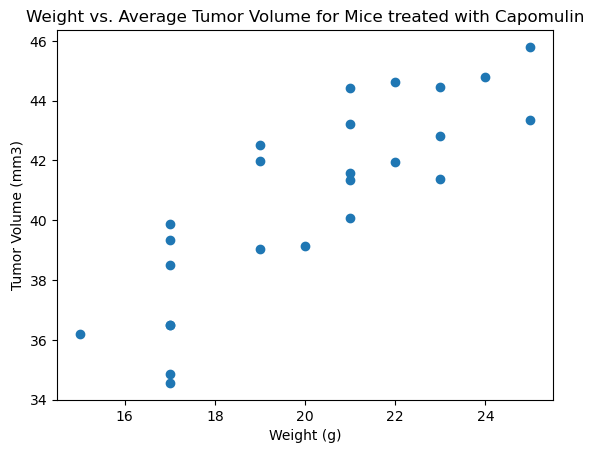

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_clean_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_clean_data_by_mouse = capomulin_clean_data.groupby("Mouse ID")
capomulin_clean_data_by_mouse = capomulin_clean_data_by_mouse[["Tumor Volume (mm3)", "Weight (g)"]].mean()
plt.scatter(capomulin_clean_data_by_mouse["Weight (g)"].values, capomulin_clean_data_by_mouse["Tumor Volume (mm3)"].values)
plt.title("Weight vs. Average Tumor Volume for Mice treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The Regression equation for the Weight and the Avg. Tumor Volume is: y = 0.95x + 21.55 where
 y:= Mouse Weight (g) 
 x:= Avg. Tumor Volume (mm3) 

The r-squared statistic is 0.7089 

The correlation between the Weight and the Avg. Tumor Volume is 0.84


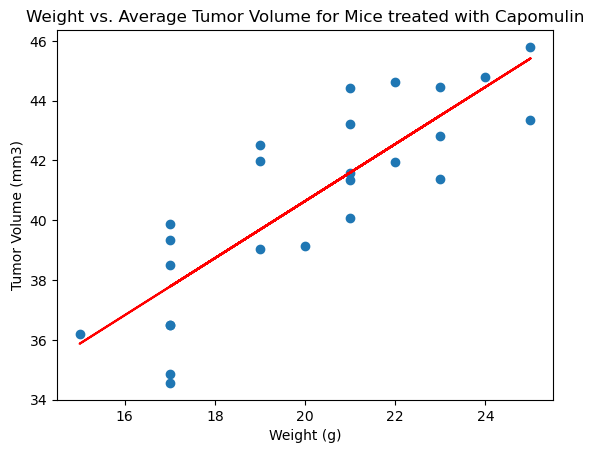

In [19]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_clean_data_by_mouse["Weight (g)"].values
y_values = capomulin_clean_data_by_mouse["Tumor Volume (mm3)"].values
(slope, intercept, rvalue, pvalue, stderr) = s.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_square = round(rvalue**2,4)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = s.pearsonr(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="Red")
plt.title("Weight vs. Average Tumor Volume for Mice treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The Regression equation for the Weight and the Avg. Tumor Volume is: {line_eq} where\n"
      " y:= Mouse Weight (g) \n"
      " x:= Avg. Tumor Volume (mm3) \n")
print(f"The r-squared statistic is {r_square} \n")
print(f"The correlation between the Weight and the Avg. Tumor Volume is {round(correlation[0],2)}")